# WV 分布

参考
```python
class WignerVilleDistribution(BaseTFRepresentation):

    name = "wigner-ville"

    def run(self):
        tausec = round(self.n_fbins / 2.0)
        winlength = tausec - 1
        taulens = np.min(np.c_[np.arange(self.signal.shape[0]),
                               self.signal.shape[0] - np.arange(self.signal.shape[0]) - 1,
                         winlength * np.ones(self.ts.shape)], axis=1)
        conj_signal = np.conj(self.signal)
        for icol in range(self.ts.shape[0]):
            taumax = taulens[icol]
            tau = np.arange(-taumax, taumax + 1).astype(int)
            indices = np.remainder(self.n_fbins + tau, self.n_fbins).astype(int)
            self.tfr[indices, icol] = self.signal[icol + tau] * \
                conj_signal[icol - tau]
            if (icol <= self.signal.shape[0] - tausec) and (icol >= tausec + 1):
                self.tfr[tausec, icol] = self.signal[icol + tausec, 0] * \
                    np.conj(self.signal[icol - tausec, 0]) + \
                    self.signal[icol - tausec, 0] * conj_signal[icol + tausec, 0]
        self.tfr = np.fft.fft(self.tfr, axis=0)
        self.tfr = np.real(self.tfr)
        self.freqs = 0.5 * np.arange(self.n_fbins, dtype=float) / self.n_fbins
        return self.tfr, self.ts, self.freqs
```

In [1]:
!pip3 install ipympl

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 定义两个信号的参数
p_t = np.array([6., 3.])
p_w = np.array([8., 4.])
p_a = np.array(10.)

# 计算中间变量
tm = np.mean(p_t)
td = p_t[0] - p_t[1]
wm = np.mean(p_w)
wd = p_w[0] - p_w[1]

# 建立WV分布自变量平面网格
t = np.linspace(2,7,100)
w = np.linspace(-10,10,100)
tt, ww = np.meshgrid(t,w, indexing="xy")
# 计算WV分布的信号项
Wa = 2 * (np.exp(-p_a * (tt - p_t[0])**2 - (1 / p_a) * (ww - p_w[0])) + np.exp(-p_a * (tt - p_t[1])**2 - (1 / p_a) * (ww - p_w[1])))
# 计算WV分布的交叉项
Wc = 4 * np.exp(-p_a * (tt - tm)**2 - (1 / p_a) * (ww - wm)**2) * np.cos((ww - wm) * td + wd * tt)

# 建立模糊函数自变量平面网格
dt = np.linspace(-5,5,100)
v = np.linspace(-5,5,100)
dtt, vv = np.meshgrid(dt, v, indexing="xy")

# 计算模糊函数的信号项
Aa = np.exp(-(p_a/4 * dtt**2 + 1/(4*p_a) * vv**2))*(np.exp(1j*(p_w[0]*dtt - p_t[0]*vv)) + np.exp(1j*(p_w[1]*dtt - p_t[1]*vv))).real
# 计算模糊函数的交叉项
Ac = np.exp(1j*(wm*dtt+vv*tm+wd*tm))*(np.exp(-1/(4*p_a)*(vv+wd)**2 - p_a/4*(dtt-td)**2) + np.exp(-1/(4*p_a)*(vv-wd)**2 - p_a/4*(dtt+td)**2))
Ac = Ac.real

In [3]:
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(tt, ww, Wa, cmap=cm.jet,
#                        linewidth=0, antialiased=False)
# # ax.set_zlim(-1.01, 1.01)
# # ax.zaxis.set_major_locator(LinearLocator(10))
# # A StrMethodFormatter is used automatically
# # ax.zaxis.set_major_formatter('{x:.02f}')

# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.show()

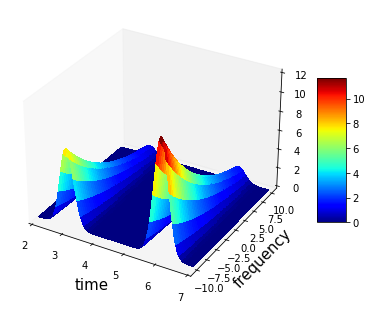

In [4]:
# 可视化
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(tt, ww, Wa, cmap=cm.jet,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel("time",fontsize=15)
plt.ylabel("frequency",fontsize=15)
plt.xlim(2,7)
ax.grid(False)
# plt.show()
plt.savefig("output/WV_auto.pdf",bbox_inches='tight')

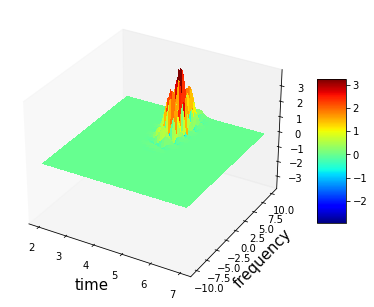

In [5]:
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(tt, ww, Wc, cmap=cm.jet,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel("time",fontsize=15)
plt.ylabel("frequency",fontsize=15)
# plt.xlim(3,5)
# plt.ylim(0,5)
ax.grid(False)
plt.savefig("output/WV_cross.pdf",bbox_inches='tight')

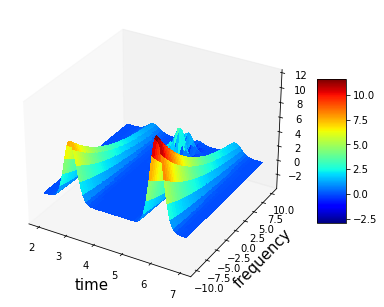

In [6]:
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(tt, ww, Wc+Wa, cmap=cm.jet,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel("time",fontsize=15)
plt.ylabel("frequency",fontsize=15)
# plt.xlim(3,5)
# plt.ylim(0,5)
ax.grid(False)
# plt.show()
plt.savefig("output/WV.pdf",bbox_inches='tight')

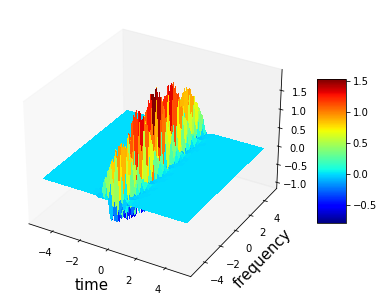

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(dtt, vv, Aa, cmap=cm.jet,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel("time",fontsize=15)
plt.ylabel("frequency",fontsize=15)
# plt.xlim(-2,2)
# plt.ylim(0,5)
ax.grid(False)
# plt.show()
plt.savefig("output/A_auto.pdf",bbox_inches='tight')

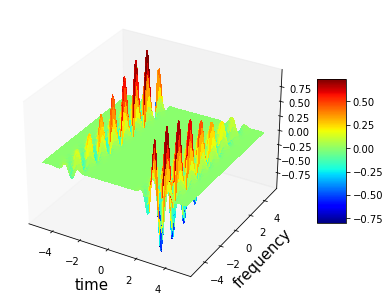

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(dtt, vv, Ac, cmap=cm.jet,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel("time",fontsize=15)
plt.ylabel("frequency",fontsize=15)
# plt.xlim(3,5)
# plt.ylim(0,5)
ax.grid(False)
# plt.show()
plt.savefig("output/A_cross.pdf",bbox_inches='tight')

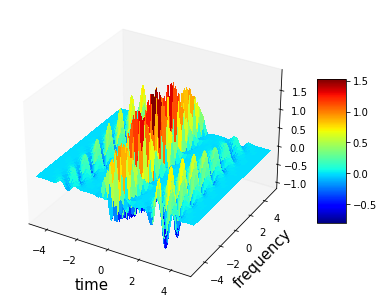

In [9]:
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(dtt, vv, Ac+Aa, cmap=cm.jet,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel("time",fontsize=15)
plt.ylabel("frequency",fontsize=15)
plt.xlim(-5,5)
# plt.ylim(0,5)
ax.grid(False)
# plt.show()
plt.savefig("output/A.pdf", bbox_inches='tight')

In [10]:
!tar -czvf output.tar.gz output

output/
output/A_auto.pdf
output/error_of_iter.pdf
output/WV.pdf
output/parameters.pdf
output/A_cross.pdf
output/A.pdf
output/WV_across.pdf
output/.ipynb_checkpoints/
output/.ipynb_checkpoints/WV_cross-checkpoint.pdf
output/.ipynb_checkpoints/A_cross-checkpoint.pdf
output/.ipynb_checkpoints/WV_across-checkpoint.pdf
output/.ipynb_checkpoints/WV_auto-checkpoint.pdf
output/.ipynb_checkpoints/A_auto-checkpoint.pdf
output/.ipynb_checkpoints/WV-checkpoint.pdf
output/.ipynb_checkpoints/A-checkpoint.pdf
output/WV_cross.pdf
output/WV_auto.pdf
